Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Training Data

In [2]:
train_base_dir = 'train'

classes = ['fire', 'nofire']

fire_file_paths = []
nofire_file_paths = []

for class_name in classes:
    class_dir = os.path.join(train_base_dir, class_name)
    
    if class_name == 'fire':
        fire_subclasses = ['Both_smoke_and_fire', 'Smoke_from_fires']
        for subclass_name in fire_subclasses:
            subclass_dir = os.path.join(class_dir, subclass_name)
            file_paths = [os.path.join(subclass_dir, file) for file in os.listdir(subclass_dir)]
            fire_file_paths.extend(file_paths)
    
    elif class_name == 'nofire':
        nofire_subclasses = ['Smoke_confounding_elements', 'Forested_areas_without_confounding_elements', 'Fire_confounding_elements']
        for subclass_name in nofire_subclasses:
            subclass_dir = os.path.join(class_dir, subclass_name)
            file_paths = [os.path.join(subclass_dir, file) for file in os.listdir(subclass_dir)]
            nofire_file_paths.extend(file_paths)

Importing the Testing Data

In [3]:
test_base_dir = 'test'

classes = ['fire', 'nofire']

fire_test_file_paths = []
nofire_test_file_paths = []

for class_name in classes:
    class_dir = os.path.join(test_base_dir, class_name)
    
    if class_name == 'fire':
        fire_subclasses = ['Both_smoke_and_fire', 'Smoke_from_fires']
        for subclass_name in fire_subclasses:
            subclass_dir = os.path.join(class_dir, subclass_name)
            file_paths = [os.path.join(subclass_dir, file) for file in os.listdir(subclass_dir)]
            fire_test_file_paths.extend(file_paths)
    
    elif class_name == 'nofire':
        nofire_subclasses = ['Smoke_confounding_elements', 'Forested_areas_without_confounding_elements', 'Fire_confounding_elements']
        for subclass_name in nofire_subclasses:
            subclass_dir = os.path.join(class_dir, subclass_name)
            file_paths = [os.path.join(subclass_dir, file) for file in os.listdir(subclass_dir)]
            nofire_test_file_paths.extend(file_paths)

Importing the Validation Data

In [4]:
val_base_dir = 'val'

classes = ['fire', 'nofire']

fire_test_file_paths = []
nofire_test_file_paths = []

for class_name in classes:
    class_dir = os.path.join(val_base_dir, class_name)
    
    if class_name == 'fire':
        fire_subclasses = ['Both_smoke_and_fire', 'Smoke_from_fires']
        for subclass_name in fire_subclasses:
            subclass_dir = os.path.join(class_dir, subclass_name)
            file_paths = [os.path.join(subclass_dir, file) for file in os.listdir(subclass_dir)]
            fire_test_file_paths.extend(file_paths)
    
    elif class_name == 'nofire':
        nofire_subclasses = ['Smoke_confounding_elements', 'Forested_areas_without_confounding_elements', 'Fire_confounding_elements']
        for subclass_name in nofire_subclasses:
            subclass_dir = os.path.join(class_dir, subclass_name)
            file_paths = [os.path.join(subclass_dir, file) for file in os.listdir(subclass_dir)]
            nofire_test_file_paths.extend(file_paths)

Creating the CNN

In [5]:
model = keras.Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 256)       0

Image Generator

In [6]:
data_gen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = data_gen.flow_from_directory(
    'train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_data_gen = ImageDataGenerator(rescale=1.0 / 255.0)

val_generator = data_gen.flow_from_directory(
    'val',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.


Compile and Train Model

In [7]:
history = model.fit(train_generator, epochs=100, validation_data=val_generator)  # Adjust the number of epochs as needed

model.save('complexCNN.h5')

Epoch 1/100
16/59 [=======>......................] - ETA: 3:10 - loss: 0.6901 - accuracy: 0.6172

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


28/59 [=============>................] - ETA: 2:14 - loss: 0.6795 - accuracy: 0.5871

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


59/59 [==============================] - 318s 5s/step - loss: 0.6461 - accuracy: 0.6041 - val_loss: 0.5941 - val_accuracy: 0.6741
Epoch 2/100
59/59 [==============================] - 310s 5s/step - loss: 0.5815 - accuracy: 0.6783 - val_loss: 0.5659 - val_accuracy: 0.6667
Epoch 3/100
59/59 [==============================] - 308s 5s/step - loss: 0.5682 - accuracy: 0.6746 - val_loss: 0.5661 - val_accuracy: 0.6741
Epoch 4/100
59/59 [==============================] - 307s 5s/step - loss: 0.5537 - accuracy: 0.6990 - val_loss: 0.5283 - val_accuracy: 0.6915
Epoch 5/100
59/59 [==============================] - 305s 5s/step - loss: 0.5566 - accuracy: 0.6847 - val_loss: 0.5549 - val_accuracy: 0.6866
Epoch 6/100
59/59 [==============================] - 306s 5s/step - loss: 0.5330 - accuracy: 0.7287 - val_loss: 0.5233 - val_accuracy: 0.7239
Epoch 7/100
59/59 [==============================] - 305s 5s/step - loss: 0.5135 - accuracy: 0.7361 - val_loss: 0.5167 - val_accuracy: 0.7313
Epoch 8/100
59/59 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Testing the Model

In [8]:
model = keras.models.load_model('complexCNN.h5')

test_data_gen = ImageDataGenerator(rescale=1.0 / 255.0)

test_generator = test_data_gen.flow_from_directory(
    'test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False 
)

test_pred = model.predict(test_generator)
test_labels = test_generator.classes

test_predictions = (test_pred > 0.5).astype(int)

test_accuracy = accuracy_score(test_labels, test_predictions)
test_precision = precision_score(test_labels, test_predictions)
test_recall = recall_score(test_labels, test_predictions)
test_f1_score = f1_score(test_labels, test_predictions)

print(f'Test accuracy: {test_accuracy * 100:.2f}%')
print(f'Test precision: {test_precision:.2f}')
print(f'Test recall: {test_recall:.2f}')
print(f'Test F1 Score: {test_f1_score:.2f}')

Found 410 images belonging to 2 classes.
 4/13 [========>.....................] - ETA: 29s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 7/13 [===============>..............] - ETA: 22s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


10/13 [======================>.......] - ETA: 12s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


13/13 [==============================] - 58s 4s/step
Test accuracy: 86.34%
Test precision: 0.85
Test recall: 0.94
Test F1 Score: 0.89


Plotting Training and Validation Loss

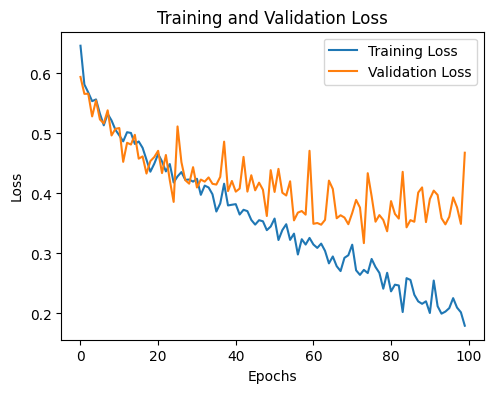

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Plotting Accuracy

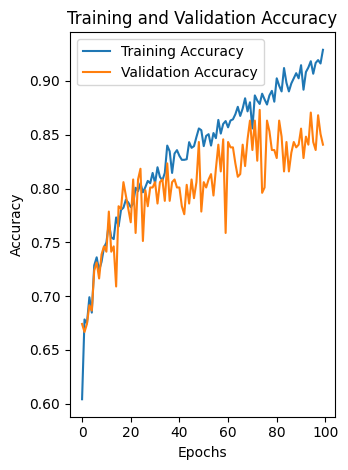

In [10]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.tight_layout()
plt.show()

Confusion Matrix

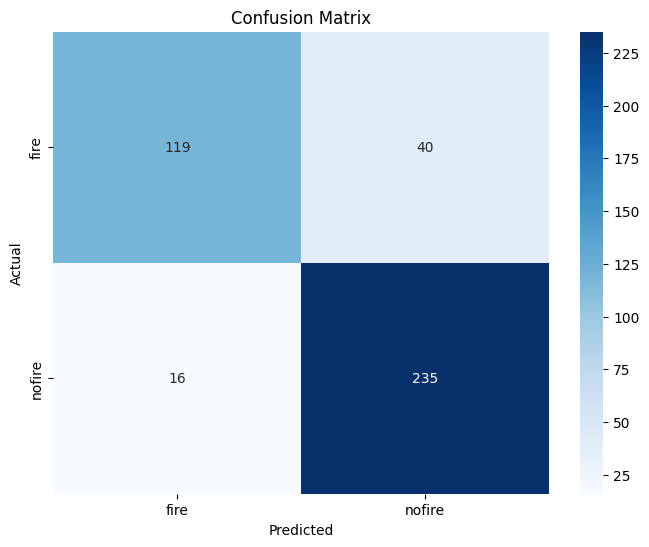

In [11]:
cm = confusion_matrix(test_labels, test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()